In [4]:
from sentence_transformers import SentenceTransformer
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\adgro\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\adgro\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\adgro\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is

In [28]:
import pandas as pd

file = pd.read_csv("formulas.csv")
formulas = file.apply(lambda row: ''.join(str(cell) for cell in row), axis=1)

In [44]:
res = 0
for i in formulas[:10000]:
    res += len(i)
print(res)

1754446


In [47]:
res = 0
for i in formulas:
    res += len(i)
print(res)

18012246


In [55]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(formulas[:20000])

In [42]:
sns.set(context="paper", style="white")
mnist = fetch_openml("mnist_784", version=1)

c:\Users\adgro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [48]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(mnist.data)

SystemError: CPUDispatcher(<function nn_descent at 0x000001EEDB3D9620>) returned a result with an exception set

In [36]:
reducer = umap.UMAP(random_state=42)

In [56]:
embedding = reducer.fit_transform(embeddings)

In [50]:
color = mnist.target.astype(int)
print(color)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int32


C:\Users\adgro\AppData\Local\Temp\ipykernel_5672\2449162697.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], cmap="Spectral", s=1)


Text(0.5, 1.0, "20'000 Latex formulas embedded into two dimensions by UMAP")

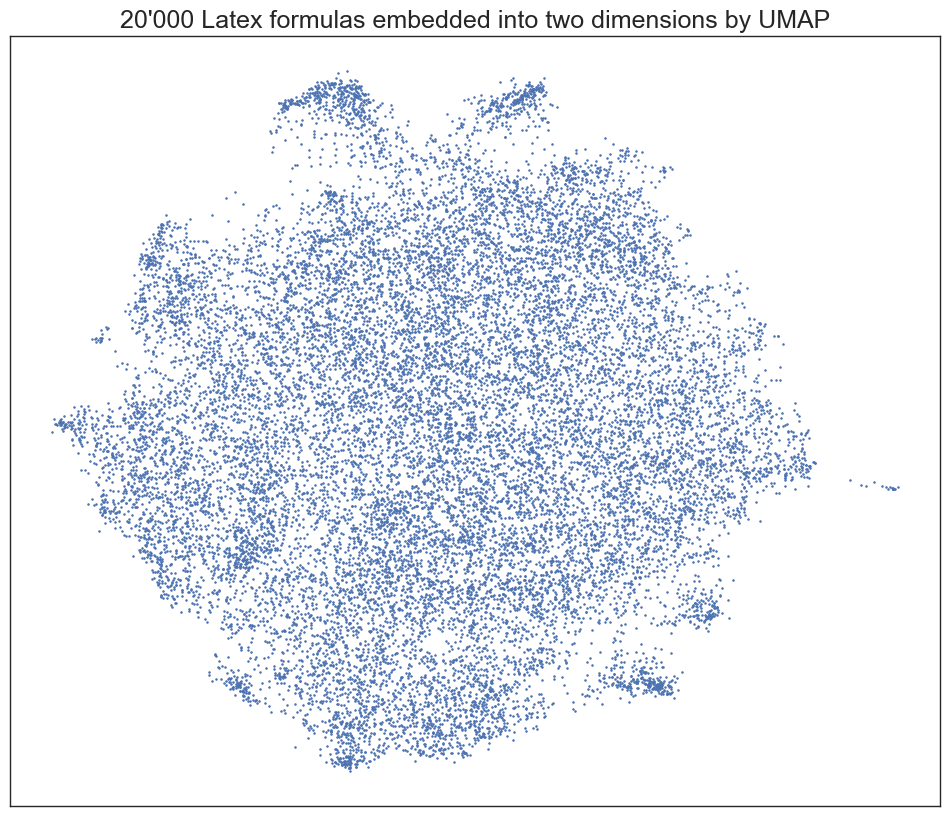

In [58]:
fig, ax = plt.subplots(figsize=(12, 10))
color = mnist.target.astype(int)
plt.scatter(embedding[:, 0], embedding[:, 1], cmap="Spectral", s=1)
plt.setp(ax, xticks=[], yticks=[])
plt.title("20'000 Latex formulas embedded into two dimensions by UMAP", fontsize=18)